[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nilsjennissen/simulations/blob/main/notebooks/simulation_func.ipynb)

# Running Simulations

In [8]:
# Import libraries
import random
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Running a for loop for simulation

# Parameters
species_1 = 10000
days = 100
lnum = 100     # location number

# Empty list to store population
population = []

# Each day...
for day in range(days):
    # A dict to store the number of doves occupying a location at any day
    locations = {}
    # Initialize each location with zero doves
    for l in range(lnum):
        locations[l] = 0

    births = 0
    deaths = 0
    daily_happenings = {'births': [], 'deaths': []}

    # For each dove, randomize its location
    for species_1 in range(species_1):
        location = random.randint(0, lnum-1)
        # If vacant, occupy :)
        if locations[location] < 2:
            locations[location] += 1
        # Else, no food, die :(
        else:
            deaths += 1
            daily_happenings['deaths'].append(location)

    # If location only occupied by one dove, can reproduce
    for location in locations:
        if locations[location] == 1:
            births += 1
            daily_happenings['births'].append(location)

    # Adjust population accordingly
    species_1 -= deaths
    species_1 += births

    population.append(species_1)
    print(f'Day_{day} Summary:\nPopulation: {species_1} \nDeaths:{deaths} Births: {births}\n {daily_happenings}\n')

Day_0 Summary:
Population: 199 
Deaths:9800 Births: 0
 {'births': [], 'deaths': [17, 29, 22, 56, 22, 81, 22, 73, 17, 75, 3, 71, 52, 26, 12, 79, 10, 62, 22, 69, 23, 26, 36, 56, 31, 71, 69, 92, 0, 84, 20, 10, 60, 56, 52, 22, 34, 29, 51, 23, 41, 14, 31, 75, 47, 42, 40, 3, 59, 83, 30, 38, 94, 58, 22, 47, 51, 94, 8, 6, 84, 58, 91, 74, 58, 38, 44, 79, 0, 28, 12, 14, 99, 8, 75, 92, 9, 79, 23, 23, 77, 80, 80, 58, 42, 29, 10, 4, 55, 16, 94, 3, 70, 79, 43, 50, 23, 82, 22, 9, 8, 74, 65, 45, 52, 94, 27, 46, 88, 42, 22, 29, 99, 2, 46, 29, 32, 33, 3, 12, 4, 2, 22, 99, 0, 36, 39, 89, 13, 75, 56, 60, 83, 38, 70, 18, 97, 31, 50, 92, 92, 93, 20, 83, 69, 43, 20, 40, 94, 55, 26, 9, 83, 38, 5, 95, 21, 51, 95, 14, 35, 86, 30, 20, 83, 75, 35, 21, 12, 76, 81, 32, 98, 89, 26, 11, 59, 93, 91, 4, 40, 30, 74, 14, 61, 79, 76, 75, 5, 9, 56, 28, 71, 60, 34, 98, 73, 60, 9, 5, 18, 56, 91, 40, 57, 92, 84, 32, 85, 30, 80, 3, 59, 16, 42, 26, 86, 63, 55, 27, 94, 28, 53, 10, 3, 44, 35, 75, 3, 19, 61, 83, 94, 26, 28, 59, 45

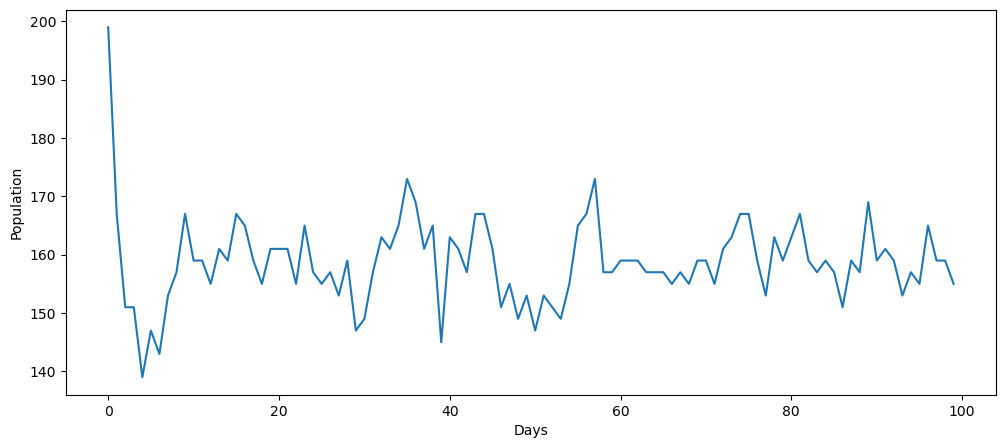

In [32]:
# Plot population
plt.figure(figsize=(12, 5))
plt.plot(population)
plt.xlabel('Days')
plt.ylabel('Population')
plt.show()

In [33]:
# Create two species to compete

# Parameters
prey = 10
predator = 2
days = 100
lnum = 100

prey_population = []
predator_population = []

daily_interactions = {}

# Each day...
for day in range(days):
    # A dict to store the number of prey occupying a location at any day
    prey_locations = {}
    predator_locations = {}
    # Intialize each location with zero prey
    for l in range(lnum):
        prey_locations[l] = 0
        predator_locations[l] = 0

    prey_births = 0
    prey_deaths = 0
    predator_births = 0
    predator_deaths = 0

    # Repeat location selection process for predators
    for predator in range(predator):
        location = random.randint(0, lnum-1)
        if prey_locations[location] + predator_locations[location] < 2:
            predator_locations[location] += 1
        else:
            predator_deaths += 1

    # For each prey, randomize its location
    for prey in range(prey):
        location = random.randint(0, lnum-1)
        # If vacant, occupy :)
        if prey_locations[location] + predator_locations[location] < 2:
            prey_locations[location] += 1
        # Else, no food, die :(
        else:
            prey_deaths += 1

    for location in prey_locations:
        at_location = prey_locations[location] + predator_locations[location]

        if prey_locations[location] == 1 and at_location == 1:
            prey_births += 1
        elif predator_locations[location] == 1 and at_location == 1:
            predator_births += 1
        elif predator_locations == 1 and at_location == 2:
            predator_births += 1
            prey_deaths += 1

    # Adjust population accordingly
    prey += prey_births
    prey -= prey_deaths
    predator += predator_births
    predator -= predator_deaths

    prey_population.append(prey)
    predator_population.append(predator)

    daily_interactions[day] = {
        "prey_population": prey_population[-1],
        "predator_population": predator_population[-1],
        "prey_births": prey_births,
        "prey_deaths": prey_deaths,
        "predator_births": predator_births,
        "predator_deaths": predator_deaths
    }

    print(f'\nDay_{day} Summary:\nPrey Population: {prey} \nPredator Population: {predator}\nPrey Deaths:{prey_deaths} Prey Births: {prey_births}\nPredator Deaths:{predator_deaths} Predator Births: {predator_births}\n')


Day_0 Summary:
Prey Population: 15 
Predator Population: 3
Prey Deaths:0 Prey Births: 6
Predator Deaths:0 Predator Births: 2


Day_1 Summary:
Prey Population: 27 
Predator Population: 5
Prey Deaths:0 Prey Births: 13
Predator Deaths:0 Predator Births: 3


Day_2 Summary:
Prey Population: 43 
Predator Population: 7
Prey Deaths:0 Prey Births: 17
Predator Deaths:0 Predator Births: 3


Day_3 Summary:
Prey Population: 61 
Predator Population: 11
Prey Deaths:4 Prey Births: 23
Predator Deaths:0 Predator Births: 5


Day_4 Summary:
Prey Population: 91 
Predator Population: 17
Prey Deaths:4 Prey Births: 35
Predator Deaths:0 Predator Births: 7


Day_5 Summary:
Prey Population: 118 
Predator Population: 22
Prey Deaths:9 Prey Births: 37
Predator Deaths:0 Predator Births: 6


Day_6 Summary:
Prey Population: 125 
Predator Population: 25
Prey Deaths:21 Prey Births: 29
Predator Deaths:0 Predator Births: 4


Day_7 Summary:
Prey Population: 129 
Predator Population: 29
Prey Deaths:26 Prey Births: 31
Preda

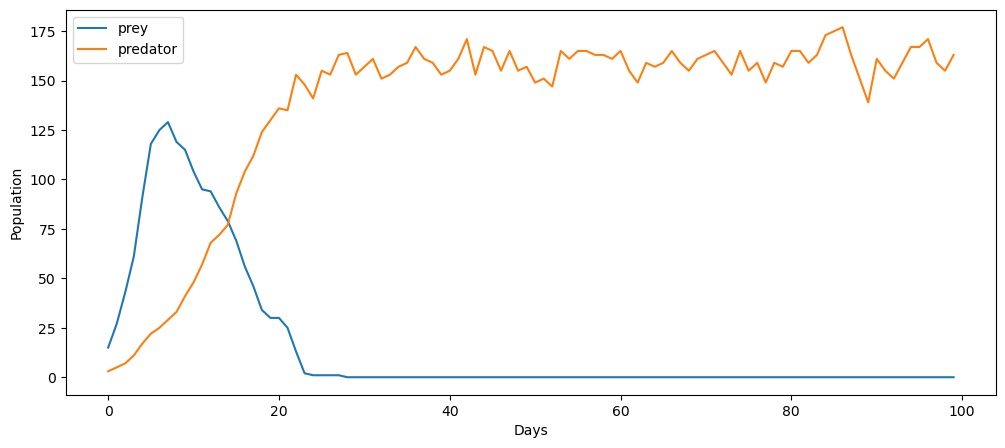

In [35]:
# Plot the population
plt.figure(figsize=(12, 5))
plt.plot(prey_population, label='prey')
plt.plot(predator_population, label='predator')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.show()

In [29]:
# Create a third species to compete
# The third species will be a predator to the predator species and the prey species

# Parameters
prey = 1000
predator = 10
predator_2 = 1
days = 100
lnum = 1000

prey_population = []
predator_population = []
predator_2_population = []

daily_interactions = {}

# Each day...
for day in range(days):
    prey_locations = {}
    predator_locations = {}
    predator_2_locations = {}
    # Intialize each location with zero prey
    for l in range(lnum):
        prey_locations[l] = 0
        predator_locations[l] = 0
        predator_2_locations[l] = 0

    prey_births = 0
    prey_deaths = 0
    predator_births = 0
    predator_deaths = 0
    predator_2_births = 0
    predator_2_deaths = 0

    # Repeat location selection process for predators
    for predator in range(predator):
        location = random.randint(0, lnum-1)
        if prey_locations[location] + predator_locations[location] + predator_2_locations[location] < 2:
            predator_locations[location] += 1
        else:
            predator_deaths += 1

    for predator_2 in range(predator_2):
        location = random.randint(0, lnum-1)
        if prey_locations[location] + predator_locations[location] + predator_2_locations[location] < 2:
            predator_2_locations[location] += 1
        else:
            predator_2_deaths += 1

    # For each prey, randomize its location
    for prey in range(prey):
        location = random.randint(0, lnum-1)
        # If vacant, occupy :)
        if prey_locations[location] + predator_locations[location] + predator_2_locations[location] < 2:
            prey_locations[location] += 1
        # Else, no food, die :(
        else:
            prey_deaths += 1

    for location in prey_locations:
        at_location = prey_locations[location] + predator_locations[location] + predator_2_locations[location]

        if prey_locations[location] == 1 and at_location == 1:
            prey_births += 1
        elif predator_locations[location] == 1 and at_location == 1:
            predator_births += 1
        elif predator_locations == 1 and at_location == 2:
            predator_births += 1
            prey_deaths += 1
        elif predator_2_locations[location] == 1 and at_location == 1:
            predator_2_births += 1
        elif predator_2_locations == 1 and at_location == 2:
            predator_2_births += 1
            prey_deaths += 1

    # Adjust population accordingly
    prey += prey_births
    prey -= prey_deaths
    predator += predator_births
    predator -= predator_deaths
    predator_2 += predator_2_births
    predator_2 -= predator_2_deaths

    prey_population.append(prey)
    predator_population.append(predator)
    predator_2_population.append(predator_2)

daily_interactions[day] = {
        "prey_population": prey_population[-1],
        "predator_population": predator_population[-1],
        "predator_2_population": predator_2_population[-1],
        "prey_births": prey_births,
        "prey_deaths": prey_deaths,
        "predator_births": predator_births,
        "predator_deaths": predator_deaths,
        "predator_2_births": predator_2_births,
        "predator_2_deaths": predator_2_deaths
    }

print(f'\nDay_{day} Summary:\nPrey Population: {prey} \nPredator Population: {predator}\nPrey Deaths:{prey_deaths} Prey Births: {prey_births}\nPredator Deaths:{predator_deaths} Predator Births: {predator_births}\nPredator 2 Deaths:{predator_2_deaths} Predator 2 Births: {predator_2_births}\n')



Day_99 Summary:
Prey Population: 0 
Predator Population: 1574
Prey Deaths:0 Prey Births: 0
Predator Deaths:350 Predator Births: 320
Predator 2 Deaths:0 Predator 2 Births: 0



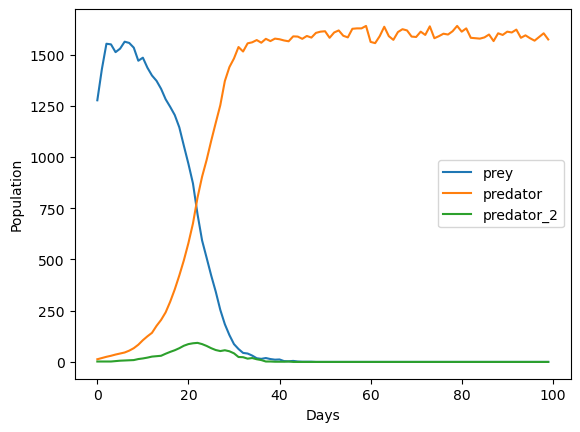

In [30]:
# Plot the populations
plt.figure(figsize=(12, 5))
plt.plot(prey_population, label='prey')
plt.plot(predator_population, label='predator')
plt.plot(predator_2_population, label='predator_2')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.show()
